# Sanjith Senthil

## Research question/interests

My research interest is using the data to analyze the app developers trends and determine which type of apps have the highest share in the google play store. This involves analyzing the share of apps in the android market on the basis of its category, price, content rating, size and ratings. This will also give us insight into what type of apps are specifically tailored to the customers on the google play store.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing dataset
df = pd.read_csv('../data/raw/google_play_store.csv')

## Task 1: Exploratory Data Analysis

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Note
Need to remove the null values to improve performance and accuracy of analysis.

In [7]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

#### Note
Need to remove the type '0' as it is an incorrect entry.

In [9]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

#### Note
Need to remove the category '1.9' because it is an incorrect entry.

In [10]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Note
Most of the numeric columns of the dataframe are of object type. This limits the scope of my Exploratory Data Analysis. Hence, I will need to first convert, clean and process the data inorder to do a more detailed exploratory data anlysis. As a result, I will continue with my exploratory data analysis after finshing task 2.

## Task 2: Analysis Pipeline

In [7]:
# Data has already been loaded above

# Remove unwanted columns
df = df.drop(["Last Updated","Current Ver","Android Ver"],axis=1)

# Remove rows with null values
df = df.dropna()
# Reset Index
df = df.reset_index()

# Remove '+' and ',' from installs column to make it numeric
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].astype(float)

# Convert all app sizes to MB
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

# Replace 'Varies with device' with 'Nan' from size column to make it numeric
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

# Remove 'M' from size column to make it numeric
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].astype(float)

# Remove '$' from price column to make it numeric
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].astype(float)

# Convert reviews to numeric type
df['Reviews'] = df['Reviews'].astype(float)

# Renaming some columns
df = df.rename(columns = {'App':'App Name', 'Size':'Size (MB)', 'Price':'Price ($)'})

df

,index,App Name,Category,Rating,Reviews,Size (MB),Installs,Type,Price ($),Content Rating,Genres
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...,...
9361,10834,FR Calculator,FAMILY,4.0,7.0,2.6,500.0,Free,0.0,Everyone,Education
9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education
9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education
9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference


#### Note:
Exporting the processed data.

In [4]:
df.to_csv("../data/processed/data_processed1.csv", index=None)

## Task 1: Exploratory Data Analysis (Continuation)

In [13]:
df.describe()

,index,Rating,Reviews,Size (MB),Installs,Price ($)
count,9366.000000,9366.000000,9.366000e+03,7729.000000,9.366000e+03,9366.000000
mean,5141.242900,4.191757,5.140498e+05,22.957607,1.789744e+07,0.960928
std,3118.830561,0.515219,3.144042e+06,23.445491,9.123822e+07,15.816585
min,0.000000,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,2452.500000,4.000000,1.862500e+02,5.300000,1.000000e+04,0.000000
50%,4882.500000,4.300000,5.930500e+03,14.000000,5.000000e+05,0.000000
75%,7876.750000,4.500000,8.153275e+04,33.000000,5.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#### Note
The ranges of all the columns are correct.

In [8]:
df.corr()

,index,Rating,Reviews,Size (MB),Installs,Price ($)
index,1.000000,-0.129778,-0.110608,-0.103235,-0.126728,-0.000867
Rating,-0.129778,1.000000,0.068141,0.083734,0.051355,-0.021903
Reviews,-0.110608,0.068141,1.000000,0.240414,0.641612,-0.009820
Size (MB),-0.103235,0.083734,0.240414,1.000000,0.162759,-0.026240
Installs,-0.126728,0.051355,0.641612,0.162759,1.000000,-0.011890
Price ($),-0.000867,-0.021903,-0.009820,-0.026240,-0.011890,1.000000


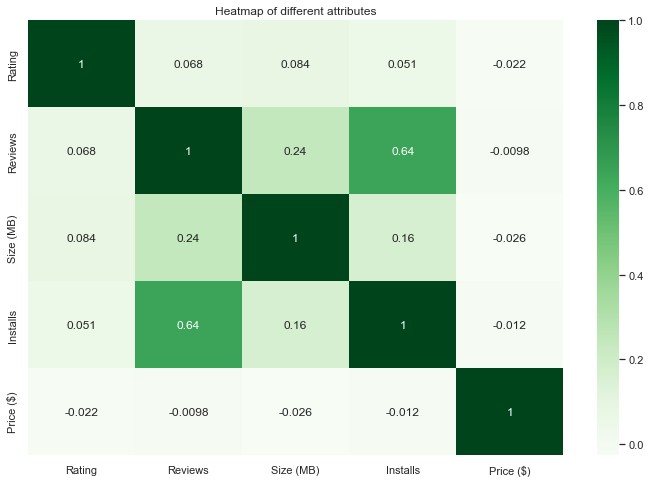

In [9]:
sns.set(rc={'figure.figsize':(12,8)})
corr = df.drop(['index'],axis=1).corr()
graph1 = sns.heatmap(corr, annot=True, cmap="Greens").set(title='Heatmap of different attributes')
plt.savefig('../images/Heatmap')

#### Observations
Installs and Reviews have the strongest positive correlation, followed by Size and Reviews. This shows that people tend to download an app if it has been reviewed by a large number of people. This also means that people who download an app usually add a review.

Rating and Price have the worst correlation. As a result, apps that are priced high usually have a low rating.

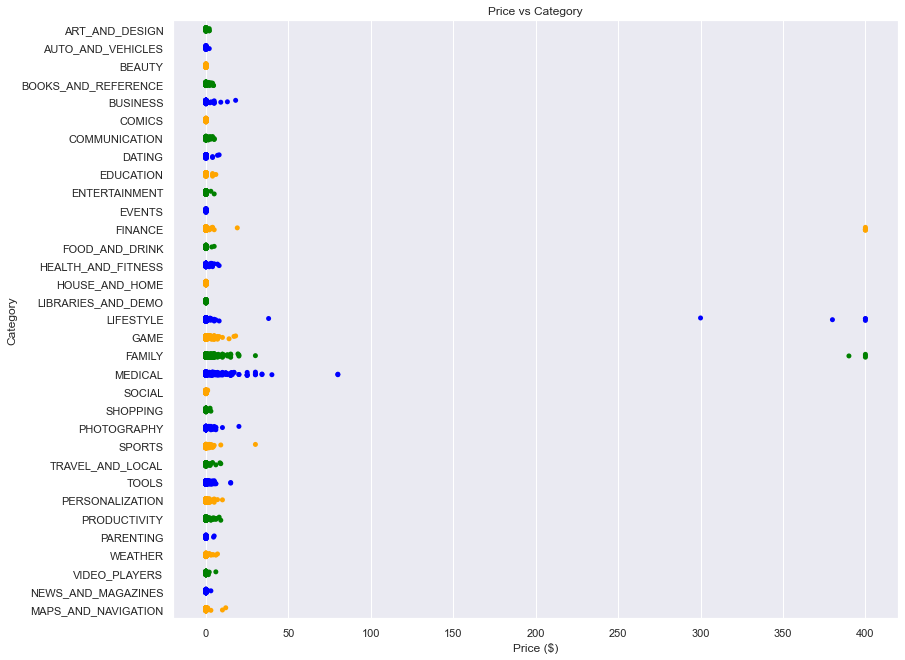

In [6]:
sns.set(rc={'figure.figsize':(13,11)})
graph2 = sns.stripplot(x='Price ($)', y='Category', data=df,  palette=['Green','Blue','Orange'], legend=False).set(title='Price vs Category')

#### Observations
The Medical and Family categories have the highest proportion of paid apps.

The Finance, Lifestyle and Family categories have the apps with the highest cost which is close to 400$.

Most of the paid apps cost under 20$.

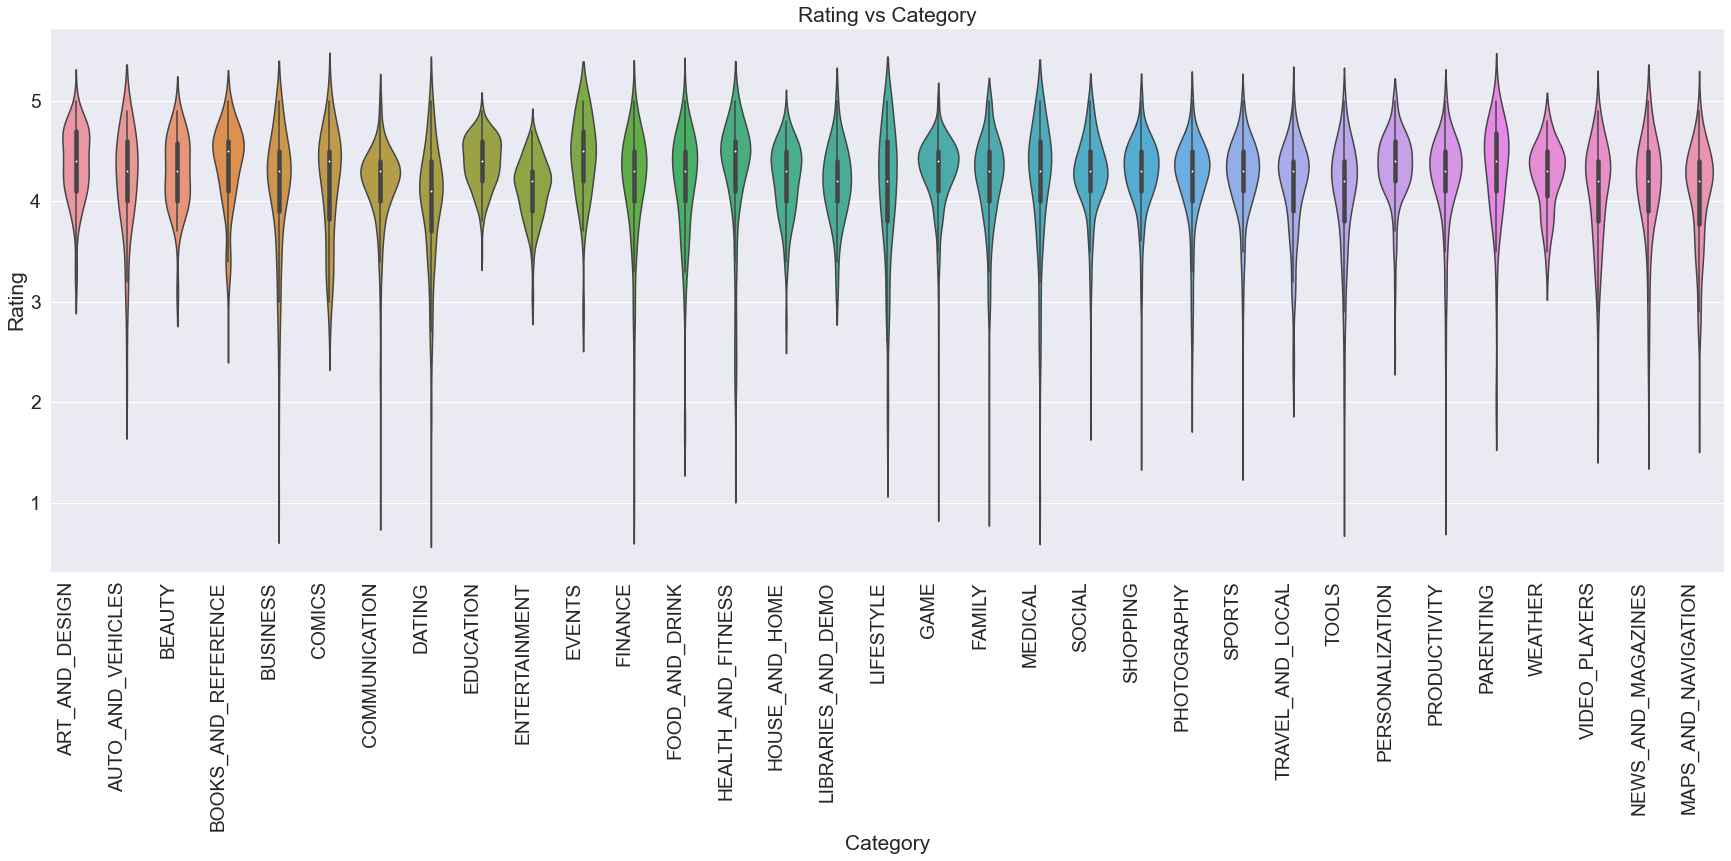

In [10]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=1.75)
graph3 = sns.violinplot(x='Category',y='Rating',data=df, split=True).set(title='Rating vs Category')
plt.xticks(rotation=90, horizontalalignment='right');
plt.savefig('../images/Violin')

#### Observations
Most of the categories have an overall rating greater than 4.

The Health and Fitness category is the best performing category, with the highest proportion of apps recieving ratings above 4.5

The Dating category is the worst performing category, with more than 50% of its apps falling below the 4 rating.

## Task 3: Method Chaining

In [4]:
import project_functions1

# The below dataframe is loaded, cleaned, processed and wrangled using method chaining.
df = project_functions1.load_and_process('../data/raw/google_play_store.csv')

df

,index,App Name,Category,Rating,Reviews,Size (MB),Installs,Type,Price ($),Content Rating,Genres
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...,...
9361,10834,FR Calculator,FAMILY,4.0,7.0,2.6,500.0,Free,0.0,Everyone,Education
9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education
9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education
9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference


## Task 4: Analysis

### Figure 1: Share of apps based on category

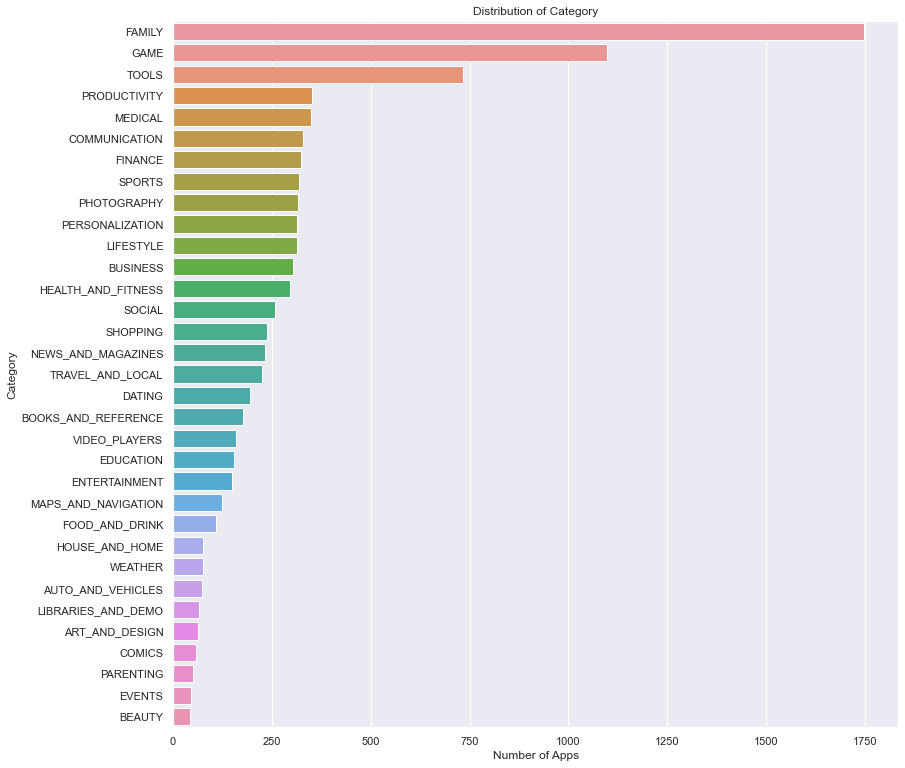

In [9]:
sns.set(rc={'figure.figsize':(13,13)})
graph1 = sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index).set(xlabel='Number of Apps', title='Distribution of Category')
plt.savefig('../images/Distribution_of_Category')

#### Observations
The Family category has the highest number of apps, followed by the Game category.

The Tools and Productivity category has also caught up.

The Beauty and Events category has the least number of apps.

### Figure 2: Proportion of free and paid apps

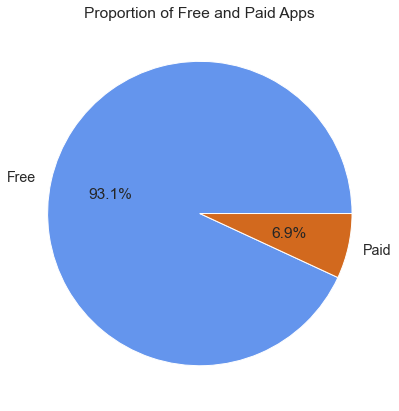

In [10]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.3)
graph2 = plt.pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%', colors=['cornflowerblue','chocolate'])
title = plt.title("Proportion of Free and Paid Apps")
plt.savefig('../images/Proportion_of_Free_and_Paid_Apps')

#### Observations
With a share of 93.1%, the majority of the apps available on the google play store are free. 

Only 6.9% of the apps found on the play store are paid.

### Figure 3: Share of apps based on content rating

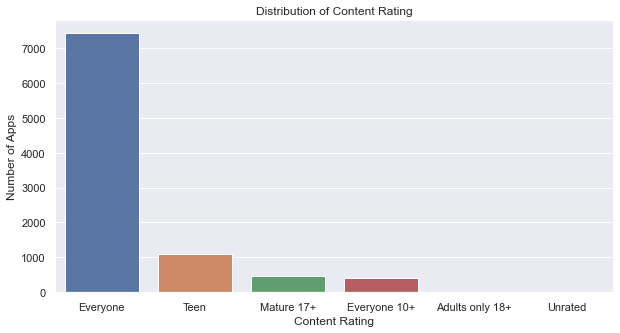

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
graph = sns.countplot(data=df, x='Content Rating', order=df['Content Rating'].value_counts().index).set(ylabel='Number of Apps', title='Distribution of Content Rating')
plt.savefig('../images/Distribution_of_Content_Rating')

#### Observations
Most apps on the google play store are meant for all users, irresrespective of their age.

There are only a few unrated and adult-only apps available.

### Figure 4: Distribution of apps based on rating

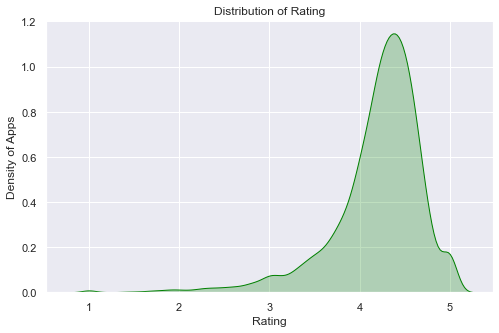

In [12]:
sns.set(rc={'figure.figsize':(8,5)})
graph = sns.kdeplot(data=df, x='Rating', color='green', fill=True).set(ylabel='Density of Apps', title='Distribution of Rating')

### Observations
Most of the apps are highly rated.

A large proportion of apps have a rating between 4 and 5.

### Figure 5: Distribution of Size by Type

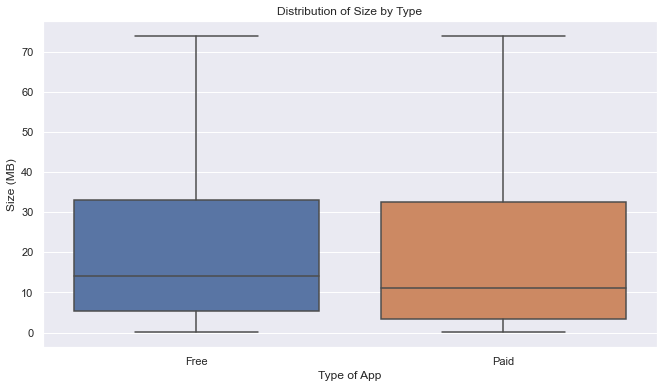

In [13]:
sns.set(rc={'figure.figsize':(11,6)})
graph = sns.boxplot(y='Size (MB)',data=df, x='Type', showfliers=False).set(title='Distribution of Size by Type',xlabel='Type of App')
plt.savefig('../images/Distribution_of_Size_by_Type')

#### Observations
Both free and paid apps have a similar distribution in terms of their size.

The size of half of the apps on the google play store is between 5 MB and 33 MB .

75% of apps have a size less than 33 MB.

25% of apps have a size less than 5 MB.

### Results and Conclusion
I have analyzed the data and experimented with a variety of different visualisations to achieve my goals of detecting app developers trends and determining the type of apps that have the highest share in the google play store. This involves examining the share of apps from each category, pricing, content rating, size, and rating. This will also help us to understand the kinds of apps that are specifically designed for or tailored to users of the Google Play store. After doing a thorough analysis, the following insights are observed:
1. The apps belonging to the Family and Game category have the highest market prevelance. It's interesting to note that the Tools and Productivity apps are also catching up. The google play store is least tailored towards customers looking for apps of the Beauty and Events category.
2. The majority of apps available on the Google Play store are intended for all users, regardless of their age. The number of unrated and adult only apps are very minimal.
3. A large proportion of apps in the google play store are free (93.1%). As a result, the play store attracts those audiences that are purely searching for only free applications. The rest apps are paid (6.9%). Most of the paid apps on the google play store cost under 20$, which is niether too cheap nor too expensive. Hence, it is targeted to customers of any income. 
4. Most of the apps perform really good and are well received by the audience, with a rating between 4 and 5. As a result, the app developers are doing a great job in satisfying and providing a great experience to the users.
5. A large share of apps are optimally sized between 5 MB and 33 MB. This means that the size of the apps are generally neither too light nor too heavy. Hence, the customers will not need to be worried about an app taking a large amount of memory from their device.